In [1]:
d1 = {'key1':[1,2,3,4,5,6],
      'key2':[7,8,9,10,11,12],
      'key3':[13,14,15,16,17,18],
      'key4':[19,20,21,22,23,24]
}

Convert the dict into pandas df!

In [2]:
import pandas as pd

In [3]:
pd.DataFrame(d1)

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,9,15,21
3,4,10,16,22
4,5,11,17,23
5,6,12,18,24


All arrays must be of the same length

In [4]:
d11 = pd.DataFrame(d1, index=['a','b','c','d','e','f'])         # naming_indexes

In [5]:
d2 = {'key1':[1,2,3,4,5,"sudh"],
      'key2':[7,8,'kumar',10,11,12],
      'key3':[13,14,15,16,17,18],
      'key4':[19,20,21,"inueron",'pwskills',24]
}

In [6]:
pd.DataFrame(d2)

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,kumar,15,21
3,4,10,16,inueron
4,5,11,17,pwskills
5,sudh,12,18,24


In [7]:
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

In [8]:
df1

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,9,15,21
3,4,10,16,22
4,5,11,17,23
5,6,12,18,24


In [9]:
df2

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,kumar,15,21
3,4,10,16,inueron
4,5,11,17,pwskills
5,sudh,12,18,24


#### MERGE OPERATION

In [10]:
pd.merge(df1,df2)            # by default ---> inner merge... or else give parameter 'how='

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20


In [11]:
pd.merge(df1,df2,how='inner',on='key1')       # inner merge on key1,[key2,3,4 remains and adds up]

,key1,key2_x,key3_x,key4_x,key2_y,key3_y,key4_y
0,1,7,13,19,7,13,19
1,2,8,14,20,8,14,20
2,3,9,15,21,kumar,15,21
3,4,10,16,22,10,16,inueron
4,5,11,17,23,11,17,pwskills


In [12]:
pd.merge(df1,df2,how='inner',on='key4')

,key1_x,key2_x,key3_x,key4,key1_y,key2_y,key3_y
0,1,7,13,19,1,7,13
1,2,8,14,20,2,8,14
2,3,9,15,21,3,kumar,15
3,6,12,18,24,sudh,12,18


In [13]:
pd.merge(df1,df2,how='left',on='key4')

,key1_x,key2_x,key3_x,key4,key1_y,key2_y,key3_y
0,1,7,13,19,1,7,13.0
1,2,8,14,20,2,8,14.0
2,3,9,15,21,3,kumar,15.0
3,4,10,16,22,NaN,NaN,NaN
4,5,11,17,23,NaN,NaN,NaN
5,6,12,18,24,sudh,12,18.0


on='key4'---> left df has all the values in key4 and the values matching with right df gets pulled else NaN

In [14]:
pd.merge(df1,df2,how='right',on='key4')

C:\Users\santa\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,key1_x,key2_x,key3_x,key4,key1_y,key2_y,key3_y
0,1.0,7.0,13.0,19.0,1,7,13
1,2.0,8.0,14.0,20.0,2,8,14
2,3.0,9.0,15.0,21.0,3,kumar,15
3,NaN,NaN,NaN,inueron,4,10,16
4,NaN,NaN,NaN,pwskills,5,11,17
5,6.0,12.0,18.0,24.0,sudh,12,18


right brings all the data from the right and the datas of left matching right on key4 allows the data from left to fill in,else NaN

In [15]:
pd.merge(df1,df2,how='outer',on='key4')

C:\Users\santa\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,key1_x,key2_x,key3_x,key4,key1_y,key2_y,key3_y
0,1.0,7.0,13.0,19.0,1,7,13.0
1,2.0,8.0,14.0,20.0,2,8,14.0
2,3.0,9.0,15.0,21.0,3,kumar,15.0
3,4.0,10.0,16.0,22.0,NaN,NaN,NaN
4,5.0,11.0,17.0,23.0,NaN,NaN,NaN
5,6.0,12.0,18.0,24.0,sudh,12,18.0
6,NaN,NaN,NaN,inueron,4,10,16.0
7,NaN,NaN,NaN,pwskills,5,11,17.0


Outer brings every combination of left and every combination of right.


Like, inner brings only the common between left and right.

# JOIN

In [16]:
df1

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,9,15,21
3,4,10,16,22
4,5,11,17,23
5,6,12,18,24


In [17]:
df2

,key1,key2,key3,key4
0,1,7,13,19
1,2,8,14,20
2,3,kumar,15,21
3,4,10,16,inueron
4,5,11,17,pwskills
5,sudh,12,18,24


In [18]:
d10 = {'key11':[1,2,3,4,5,"sudh"],
      'key22':[7,8,9,10,11,12],
      'key33':[13,14,15,16,17,18],
      'key44':[19,20,21,22,23,24]
}

In [19]:
d20 = {'key1':[1,2,3,4,5,"sudh"],
      'key2':[7,8,'kumar',10,11,12],
      'key3':[13,14,15,16,17,18],
      'key4':[19,20,21,"inueron",'pwskills',24]
}

In [20]:
df10=pd.DataFrame(d10,index=[1,2,3,4,5,"sudh"])

In [21]:
df20=pd.DataFrame(d20,index=[1,2,3,4,5,6])

In [22]:
df10

,key11,key22,key33,key44
1,1,7,13,19
2,2,8,14,20
3,3,9,15,21
4,4,10,16,22
5,5,11,17,23
sudh,sudh,12,18,24


In [23]:
df20

,key1,key2,key3,key4
1,1,7,13,19
2,2,8,14,20
3,3,kumar,15,21
4,4,10,16,inueron
5,5,11,17,pwskills
6,sudh,12,18,24


In [24]:
df10.join(df20)

,key11,key22,key33,key44,key1,key2,key3,key4
1,1,7,13,19,1,7,13.0,19
2,2,8,14,20,2,8,14.0,20
3,3,9,15,21,3,kumar,15.0,21
4,4,10,16,22,4,10,16.0,inueron
5,5,11,17,23,5,11,17.0,pwskills
sudh,sudh,12,18,24,NaN,NaN,NaN,NaN


In [25]:
df10.join(df20,how='right')

,key11,key22,key33,key44,key1,key2,key3,key4
1,1,7.0,13.0,19.0,1,7,13,19
2,2,8.0,14.0,20.0,2,8,14,20
3,3,9.0,15.0,21.0,3,kumar,15,21
4,4,10.0,16.0,22.0,4,10,16,inueron
5,5,11.0,17.0,23.0,5,11,17,pwskills
6,NaN,NaN,NaN,NaN,sudh,12,18,24


In [26]:
df10.join(df20,how='outer')

,key11,key22,key33,key44,key1,key2,key3,key4
1,1,7.0,13.0,19.0,1,7,13.0,19
2,2,8.0,14.0,20.0,2,8,14.0,20
3,3,9.0,15.0,21.0,3,kumar,15.0,21
4,4,10.0,16.0,22.0,4,10,16.0,inueron
5,5,11.0,17.0,23.0,5,11,17.0,pwskills
6,NaN,NaN,NaN,NaN,sudh,12,18.0,24
sudh,sudh,12.0,18.0,24.0,NaN,NaN,NaN,NaN


In [27]:
df10.join(df20,how='inner')

,key11,key22,key33,key44,key1,key2,key3,key4
1,1,7,13,19,1,7,13,19
2,2,8,14,20,2,8,14,20
3,3,9,15,21,3,kumar,15,21
4,4,10,16,22,4,10,16,inueron
5,5,11,17,23,5,11,17,pwskills


Join checks for indexes(index matching) whereas merge checks for the column values(value matching).

# NumPy

In [28]:
import numpy as np

In [29]:
l=[1,2,3,4,4]

In [30]:
type(l)

list

In [31]:
a= np.array(l)

In [32]:
type(a)

numpy.ndarray

In [33]:
a

array([1, 2, 3, 4, 4])

In [34]:
a1=np.array([[1,2,3],[3,4,5]])

In [35]:
a1

array([[1, 2, 3],
       [3, 4, 5]])

In [36]:
a2=np.array([[[1,2,3],[3,4,5]]])

In [37]:
a2

array([[[1, 2, 3],
        [3, 4, 5]]])

In [38]:
a.ndim            # n dimension

1

In [39]:
a1.ndim

2

In [40]:
a2.ndim

3

In [41]:
a3=np.array([[[1,2,3],[4,.5,6]],[[1,2,3],[4,.5,6]],[[1,2,3],[4,.5,6]]])

In [42]:
a3

array([[[1. , 2. , 3. ],
        [4. , 0.5, 6. ]],

       [[1. , 2. , 3. ],
        [4. , 0.5, 6. ]],

       [[1. , 2. , 3. ],
        [4. , 0.5, 6. ]]])

In [43]:
a3.ndim

3

In [44]:
l=[1,2,3,4]

In [45]:
np.asarray(l)                # Array can be 1D

array([1, 2, 3, 4])

In [46]:
np.matrix(l)             # Matrix is minimum 2 dimensions (atleast)

matrix([[1, 2, 3, 4]])

In [47]:
a=np.asarray(l) 
b=np.matrix(l)  

In [48]:
np.asanyarray(a)        # if already an array, keeps it as it is

array([1, 2, 3, 4])

In [49]:
np.asanyarray(b)            # matrix remains as matrix

matrix([[1, 2, 3, 4]])

In [50]:
np.asanyarray(l)           # changes a list into array

array([1, 2, 3, 4])

In [51]:
np.fromfunction(lambda i,j: i==j,(3,4))

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False]])

In [52]:
np.random.rand(2,3,2)        # 2 matrix of 3x2

array([[[0.85414005, 0.76109103],
        [0.14366965, 0.05853281],
        [0.70055983, 0.94626324]],

       [[0.68725936, 0.78710184],
        [0.8542202 , 0.11397896],
        [0.68240551, 0.11128865]]])

In [53]:
np.random.rand(3,4,4)

array([[[0.95271902, 0.98024337, 0.6310655 , 0.40739368],
        [0.33774454, 0.7285892 , 0.84798894, 0.05225721],
        [0.38704544, 0.52642586, 0.64982933, 0.44830154],
        [0.77197632, 0.69308854, 0.1783927 , 0.34908578]],

       [[0.5144048 , 0.86296107, 0.26916728, 0.36976946],
        [0.30797067, 0.70553648, 0.33598392, 0.17897608],
        [0.99257268, 0.17594697, 0.53161951, 0.75563434],
        [0.14117716, 0.58424131, 0.54918986, 0.6609576 ]],

       [[0.66788189, 0.59197954, 0.34398449, 0.58622694],
        [0.41268476, 0.90019747, 0.86603039, 0.28976177],
        [0.93583735, 0.65400572, 0.83259586, 0.92677267],
        [0.85322699, 0.38047908, 0.57085305, 0.61167778]]])

In [54]:
np.random.randn(2,3,3)

array([[[-0.24955352, -1.07919201, -0.4269355 ],
        [ 0.76867275, -1.32213668, -0.21532383],
        [-1.32870631,  1.09867296,  1.02537651]],

       [[-0.77285967, -0.91288557,  2.22194891],
        [-0.8969154 ,  0.76244099, -0.66473165],
        [-2.4082032 , -0.58770415, -1.13979174]]])

In [55]:
np.random.randint(0,10,(4,4,2))

array([[[5, 3],
        [2, 3],
        [0, 0],
        [2, 7]],

       [[4, 7],
        [7, 4],
        [4, 4],
        [0, 8]],

       [[0, 1],
        [5, 2],
        [3, 7],
        [3, 8]],

       [[5, 5],
        [5, 6],
        [7, 0],
        [9, 2]]])

In [56]:
d = np.random.randn(3,4)

In [57]:
import pandas as pd

In [58]:
pd.DataFrame(d)

,0,1,2,3
0,0.887196,0.518513,0.989517,-0.308004
1,1.107848,0.298390,0.540122,2.503570
2,-0.803694,-0.391451,-1.199197,0.465405


In [59]:
d1 = np.random.randint(0,10,(4,4,2))

In [60]:
d1.reshape(8,4)

array([[4, 0, 9, 7],
       [8, 1, 5, 3],
       [2, 3, 0, 3],
       [7, 7, 2, 2],
       [1, 9, 1, 6],
       [1, 5, 5, 1],
       [5, 2, 9, 2],
       [9, 5, 0, 2]])

NUMPY & GRAPH [LIVE CLASS]

In [61]:
import numpy as np

In [62]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

How to generate decimals? advanced range(arange)

In [63]:
np.arange(.5,10)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [64]:
np.arange(.5,-5,-1)

array([ 0.5, -0.5, -1.5, -2.5, -3.5, -4.5])

In [65]:
np.linspace(1,5,20)

array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
       2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
       3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
       4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ])

linspace creating a range of 1 to 5 and making 20 divisions within that range.

list(np.linspace(1,5,20))

To get the jump_Size,use retstep=True

In [66]:
list(np.linspace(1,5,20,retstep=True))

[array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
        2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
        3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
        4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ]),
 0.21052631578947367]

retstep is given at the last.

In [67]:
np.logspace(1,50,10)

array([1.00000000e+01, 2.78255940e+06, 7.74263683e+11, 2.15443469e+17,
       5.99484250e+22, 1.66810054e+28, 4.64158883e+33, 1.29154967e+39,
       3.59381366e+44, 1.00000000e+50])

In [68]:
np.zeros((3,4,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [69]:
np.ones((5,3,2)) + 5

array([[[6., 6.],
        [6., 6.],
        [6., 6.]],

       [[6., 6.],
        [6., 6.],
        [6., 6.]],

       [[6., 6.],
        [6., 6.],
        [6., 6.]],

       [[6., 6.],
        [6., 6.],
        [6., 6.]],

       [[6., 6.],
        [6., 6.],
        [6., 6.]]])

In [70]:
np.empty((2,3))

array([[0.5, 0.5, 1.5],
       [2.5, 3.5, 4.5]])

# Graph

In [71]:
!pip install cufflinks

In [72]:
import cufflinks as cf
import numpy as np
import pandas as pd
import seaborn as sns

In [77]:
df = pd.DataFrame(np.random.randn(100,3),columns=["A","B","C"])

In [74]:
cf.go_offline()

In [76]:
pip install chart_studio


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

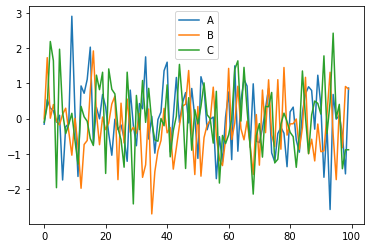

In [78]:
df.plot()

In [79]:
df.iplot()

In [80]:
df[["A"]].iplot()

In [81]:
df.iplot(x="A",y="B")

In [82]:
df.iplot(x="A",y="B",mode="markers",size=5)

In [90]:
df.iplot(kind='bubble',x="A",y="B",size="C")

In [92]:
df1=sns.load_dataset('titanic')

In [93]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [95]:
df1.iplot(x='sex',y='survived',kind="bar",xTitle="Sex",yTitle="Survived")

In [98]:
df1[['age','fare']].iplot(x="age",y="fare",mode="markers",size=5)

In [99]:
tip=sns.load_dataset('tips')

In [100]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [102]:
tip[['total_bill','tip']].iplot(x="total_bill",y='tip',mode='markers',size=5)

In [103]:
tip.iplot(kind='scatter3d',x="total_bill",y='tip',z='size')

In [105]:
tip.iplot(kind='bubble3d',x="total_bill",y='tip',z='size',size='size')

In [106]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


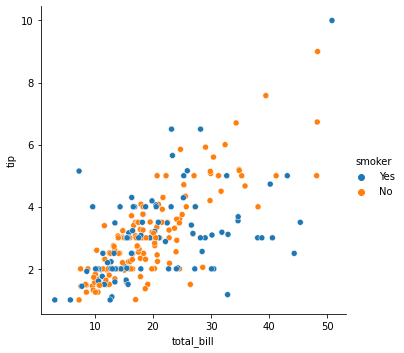

In [108]:
sns.relplot(x='total_bill',y='tip',data=tip,hue='smoker')

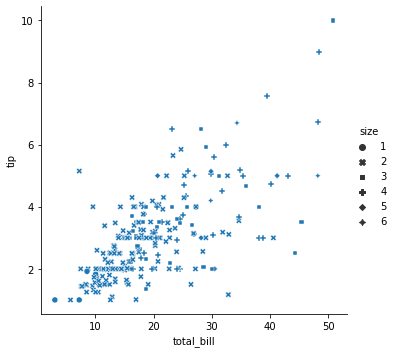

In [109]:
sns.relplot(x='total_bill',y='tip',data=tip,style='size')

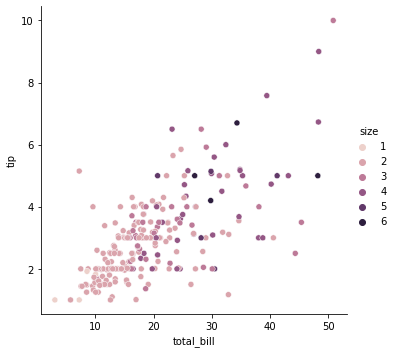

In [110]:
sns.relplot(x='total_bill',y='tip',data=tip,hue='size')

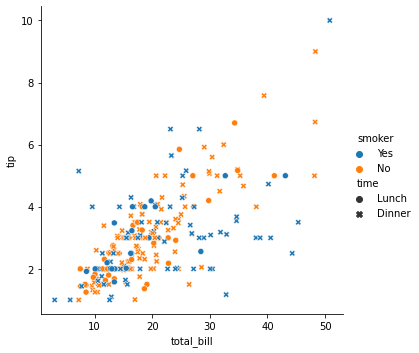

In [111]:
sns.relplot(x='total_bill',y='tip',data=tip,hue='smoker',style='time')

In [112]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [113]:
iris=sns.load_dataset('iris')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

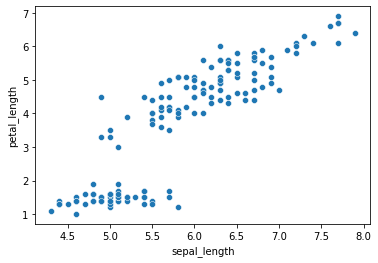

In [115]:
sns.scatterplot(x="sepal_length",y="petal_length",data=iris)

<AxesSubplot:>

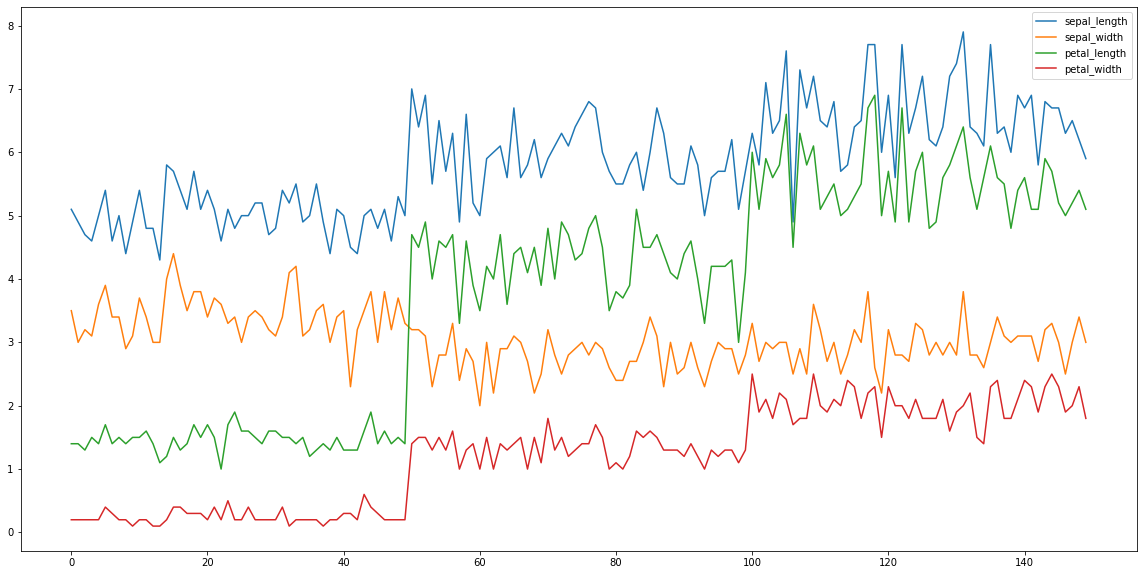

In [118]:
iris.plot(figsize=(20,10))

<AxesSubplot:>

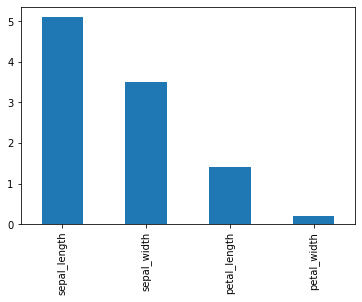

In [120]:
iris.iloc[0,[0,1,2,3]].plot(kind='bar')

<AxesSubplot:>

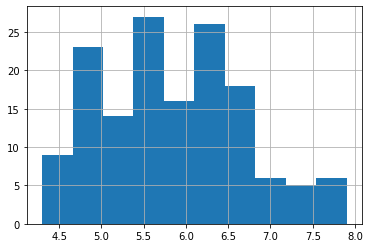

In [121]:
iris['sepal_length'].hist()

In [122]:
data=iris.iloc[0,[0,1,2,3]]

<AxesSubplot:ylabel='0'>

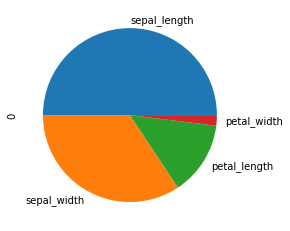

In [123]:
data.plot.pie()


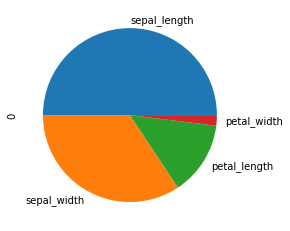

In [124]:
a=data.plot.pie()
b=a.get_figure()
b.savefig('test.png')

In [125]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1600-9EB4

 Directory of C:\Users\santa

06-04-2023  15:54    <DIR>          .
22-09-2022  14:03    <DIR>          ..
22-08-2022  12:19    <DIR>          .anaconda
08-02-2023  16:31    <DIR>          .conda
22-08-2022  12:19                25 .condarc
22-08-2022  12:18    <DIR>          .continuum
06-04-2023  13:10    <DIR>          .cufflinks
07-03-2023  12:25                58 .gitconfig
20-03-2023  10:52                53 .git-for-windows-updater
10-07-2022  18:25    <DIR>          .idlerc
05-04-2023  18:57    <DIR>          .ipynb_checkpoints
22-08-2022  13:10    <DIR>          .ipython
22-08-2022  14:04    <DIR>          .jupyter
14-03-2023  12:17    <DIR>          .matplotlib
27-08-2022  08:26                43 .python_history
27-02-2023  14:06               527 .vivaldi_reporting_data
04-01-2023  10:28    <DIR>          .vscode
17-02-2023  14:53    <DIR>          __pycache__
14-03-2023  12:07             1,173 addresses.csv
14-03

# Check Bokeh,Plotly,Matplotlib and Seaborn documentation

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

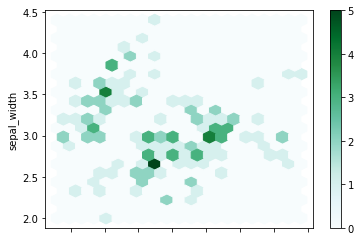

In [127]:
iris.plot.hexbin(x='sepal_length',y='sepal_width',gridsize=20)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

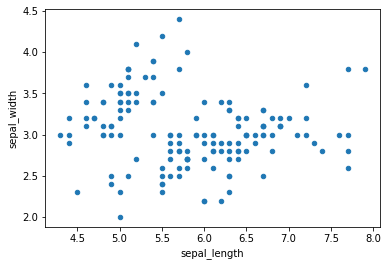

In [128]:
iris.plot.scatter(x='sepal_length',y='sepal_width',s=20)

# Mainly focus on plotly and bokeh!